# **Top 10 Pitchers Data Visualization** <hr>

**Name:** Joshua M. Bito-on <br>
**Course:** BSCPE-2A

Import **pandas**,**numpy** and **matplotlib** library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r"C:\Users\romme\Desktop\MATHEDA Bito-on\ENDTERM PROJECT\cleaned\baseball_pitcher-cleaned.csv",
                 delimiter=",")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575 entries, 0 to 2574
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pitcher Name          2575 non-null   object 
 1   Position              2575 non-null   object 
 2   Win                   2575 non-null   int64  
 3   Loss                  2575 non-null   int64  
 4   Earned Run Average    2575 non-null   float64
 5   Games Played          2575 non-null   int64  
 6   Games Started         2575 non-null   int64  
 7   Complete Games        2575 non-null   int64  
 8   Shutout               2575 non-null   int64  
 9   Save                  2575 non-null   int64  
 10  Save Opportunity      2575 non-null   float64
 11  Innings Pitched (IP)  2575 non-null   float64
 12  Hits                  2575 non-null   int64  
 13  Earned Runs (ER)      2575 non-null   int64  
 14  Home Runs (HR)        2575 non-null   int64  
 15  Hit by Pitch (HBP)   

,Pitcher Name,Position,Win,Loss,Earned Run Average,Games Played,Games Started,Complete Games,Shutout,Save,Save Opportunity,Innings Pitched (IP),Hits,Earned Runs (ER),Home Runs (HR),Hit by Pitch (HBP),Base on Balls (BOB),Strikeouts (SO),WHIP,AVG
0,N Ryan,P,324,292,3.19,807,773,222,61,3,4.0,5386.0,3923,1911,321,158,2795.0,5714,1.25,0.204
1,R Johnson,P,303,166,3.29,618,603,100,37,2,3.0,4135.1,3346,1513,411,190,1497.0,4875,1.17,0.221
2,R Clemens,P,354,184,3.12,709,707,118,46,0,0.0,4916.2,4185,1707,363,159,1580.0,4672,1.17,0.229
3,S Carlton,P,329,244,3.22,741,709,254,55,2,2.0,5217.1,4672,1864,414,53,1833.0,4136,1.25,0.240
4,B Blyleven,P,287,250,3.31,692,685,242,60,0,0.0,4970.0,4632,1830,430,155,1322.0,3701,1.20,0.248


**Filtering** the top 10 Pitchers as referenced in a website

In [15]:
# Define top 10 pitchers based on the article (formatted as First Initial + Last Name)
top_10_last_names = {
    "Johnson": "W", "Mathewson": "C", "Young": "C", "Alexander": "G",
    "Clemens": "R", "Seaver": "T", "Maddux": "G", "Martinez": "P",
    "Kershaw": "C"
}

In [16]:
# Extract first initials and last names
df["Last Name"] = df["Pitcher Name"].apply(lambda x: x.split()[-1] if isinstance(x, str) else "")
df["First Initial"] = df["Pitcher Name"].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 1 else "")

In [17]:
# Find matching names
matched_pitchers = df[df["Last Name"].isin(top_10_last_names.keys()) & df["First Initial"].isin(top_10_last_names.values())]

In [18]:
# Keep only the best career stats (based on lowest ERA)
matched_pitchers = matched_pitchers.sort_values("Earned Run Average").drop_duplicates(subset=["Last Name"], keep="first")

In [19]:
# Select relevant columns
stats = ["Win", "Earned Run Average", "Strikeouts (SO)", "WHIP", "AVG"]
matched_pitchers = matched_pitchers[["Pitcher Name"] + stats]

In [20]:
# Display final dataset
matched_pitchers

,Pitcher Name,Win,Earned Run Average,Strikeouts (SO),WHIP,AVG
38,C Mathewson,373,2.13,2502,1.06,0.236
8,W Johnson,417,2.17,3508,1.06,0.227
22,C Kershaw,198,2.48,2816,1.00,0.209
65,G Alexander,373,2.56,2198,1.12,0.250
24,C Young,511,2.63,2803,1.13,0.252
5,T Seaver,311,2.86,3640,1.12,0.226
14,P Martinez,219,2.93,3154,1.05,0.214
2,R Clemens,354,3.12,4672,1.17,0.229
9,G Maddux,355,3.16,3371,1.14,0.250


## Statistical **Visualizations**

Graph of **Wins** (Higher is Better)

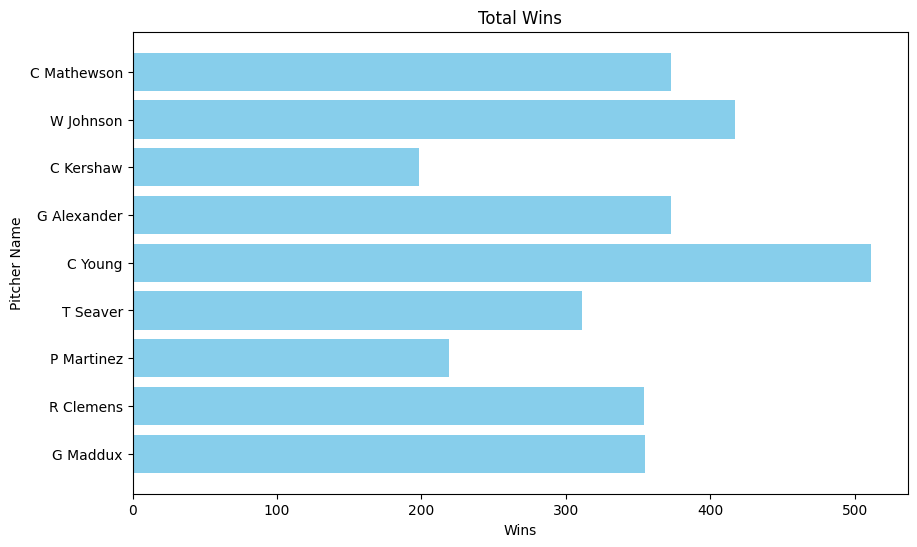

In [21]:

plt.figure(figsize=(10, 6))
plt.barh(matched_pitchers["Pitcher Name"], matched_pitchers["Win"], color="skyblue")
plt.xlabel("Wins")
plt.ylabel("Pitcher Name")
plt.title("Total Wins")
plt.gca().invert_yaxis()
plt.show()


Graph of **ERA** (Lower is Better)

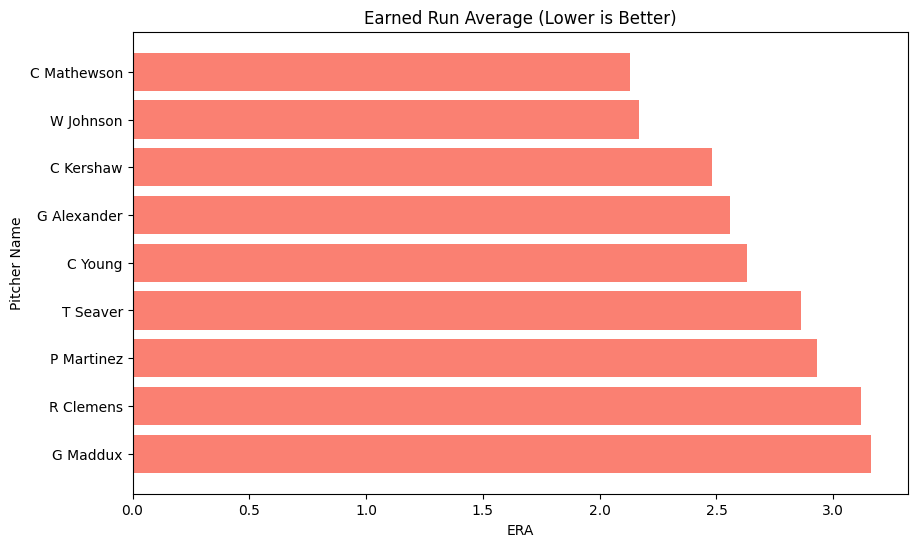

In [22]:

plt.figure(figsize=(10, 6))
plt.barh(matched_pitchers["Pitcher Name"], matched_pitchers["Earned Run Average"], color="salmon")
plt.xlabel("ERA")
plt.ylabel("Pitcher Name")
plt.title("Earned Run Average (Lower is Better)")
plt.gca().invert_yaxis()
plt.show()


Graph of **Strikeouts** (Higher is Better)

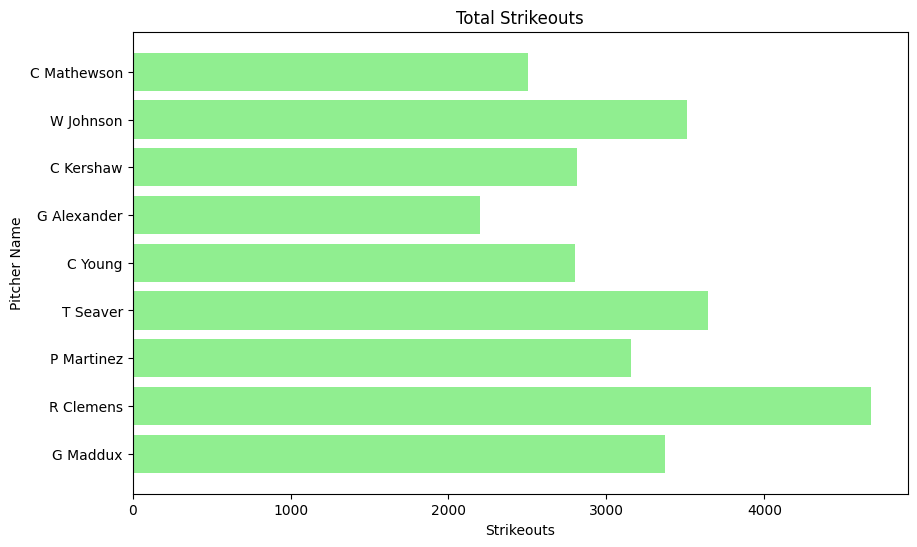

In [23]:

plt.figure(figsize=(10, 6))
plt.barh(matched_pitchers["Pitcher Name"], matched_pitchers["Strikeouts (SO)"], color="lightgreen")
plt.xlabel("Strikeouts")
plt.ylabel("Pitcher Name")
plt.title("Total Strikeouts")
plt.gca().invert_yaxis()
plt.show()


Graph of **WHIP** - Walks + Hits per Inning Pitched - (Lower is Better)

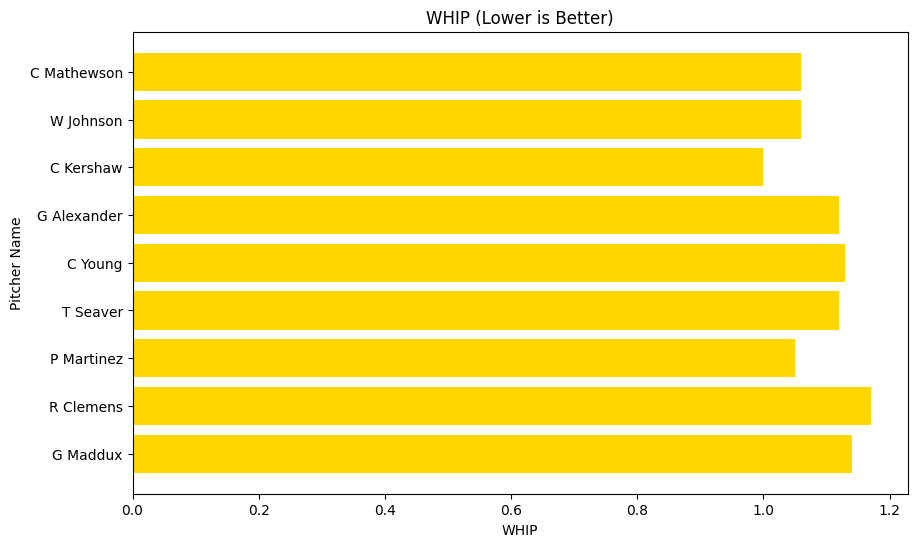

In [24]:

plt.figure(figsize=(10, 6))
plt.barh(matched_pitchers["Pitcher Name"], matched_pitchers["WHIP"], color="gold")
plt.xlabel("WHIP")
plt.ylabel("Pitcher Name")
plt.title("WHIP (Lower is Better)")
plt.gca().invert_yaxis()
plt.show()


Graph of Opponent Batting Average - AVG (Higher is Better)

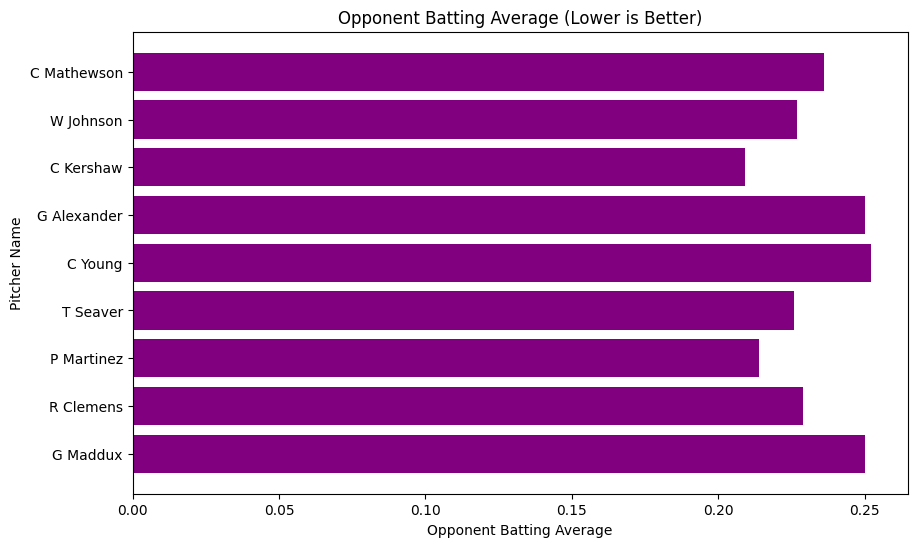

In [25]:

plt.figure(figsize=(10, 6))
plt.barh(matched_pitchers["Pitcher Name"], matched_pitchers["AVG"], color="purple")
plt.xlabel("Opponent Batting Average")
plt.ylabel("Pitcher Name")
plt.title("Opponent Batting Average (Lower is Better)")
plt.gca().invert_yaxis()
plt.show()


## **Conclusion** <hr>

The graphs provided showcases the most important statline for an MVP-caliber Pitcher. Though the dataset provided doesn't have other important stats like WAR (Wins Above Replacement), the following data provided is enough to make a statistical guess on who the best pitchers in MLB history are.